# Homework 6 (distributions, statistical error, and scatter plots)

For this homework assignment you are required to use Python (pandas, matplotlib, and seaborn) to do the exercises. Please write your own code and provide your code along with your responses to the questions. 

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Climate Data

For this assignment we will continue visualizing the Delhi, India climate data set. 
* To get started, load the climate data provided on Canvas
* Data source:  https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data 


In [39]:
df_temps = pd.read_csv("DailyDelhiClimateTrain.csv")

df_temps['date'] = pd.to_datetime(df_temps['date'])
df_temps['month_name'] = df_temps['date'].dt.month_name()

df_temps.head()

,date,meantemp,humidity,wind_speed,meanpressure,month_name
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,January
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,January
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,January
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,January
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,January


### Problem 1 (1.5 points)

First, create a new column in `df_temps` that contains the name of the month ("January", "February", etc.) of the date for each row. Then visualize the average temperatures recorded in January in two ways:
* Plot a density curve 
* Make a scatter plot (plot temperature along the x-axis, and use "jittering" to spread out the dots vertically)

For the jittering, you may create your own randomness (e.g. sample from a uniform distribution), or use a built-in solution (e.g. seaborn stripplot -- https://seaborn.pydata.org/generated/seaborn.stripplot.html )

In [40]:
# Your answer here

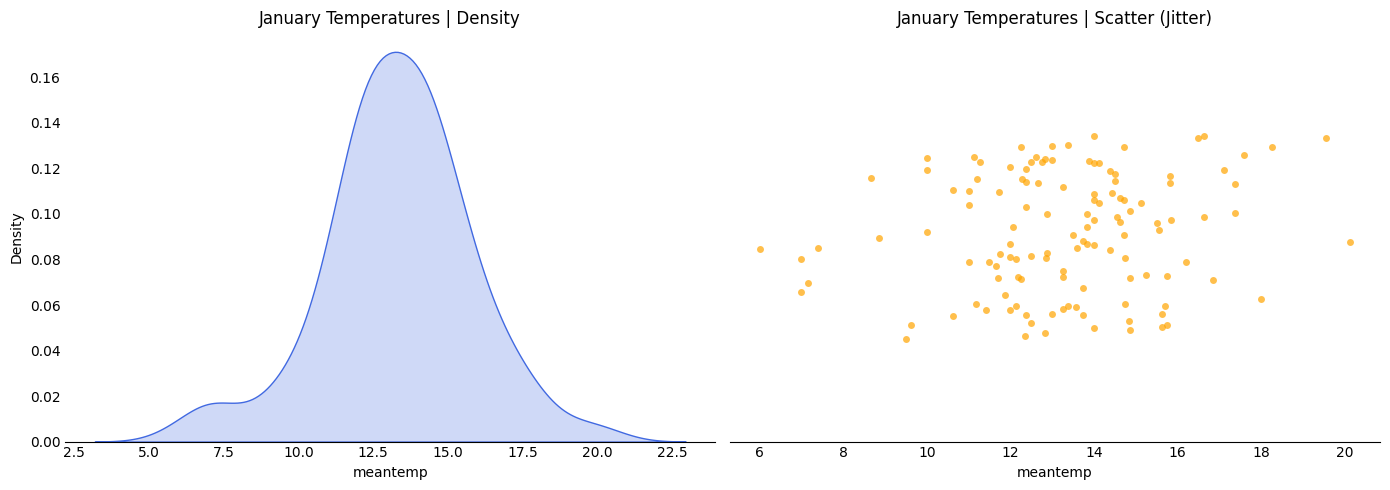

In [76]:
df_jan = df_temps[df_temps['month_name'] == 'January']

fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharey=False)

# density
sns.kdeplot(data=df_jan, x='meantemp', fill=True, ax=axes[0], color='royalblue')
axes[0].set_title("January Temperatures | Density")

# jitter | seaborn stripplot
sns.stripplot(data=df_jan, x='meantemp', ax=axes[1], jitter=0.25, color='orange', alpha=0.7)
axes[1].set_title("January Temperatures | Scatter (Jitter)")

axes[0].tick_params(axis="x", length = 0)
axes[0].tick_params(axis="y", length = 0)
axes[1].tick_params(axis="x", length = 0)
axes[1].tick_params(axis="y", length = 0)
axes[0].spines[["left", "top", "right"]].set_visible(False)
axes[1].spines[["left", "top", "right"]].set_visible(False)

plt.tight_layout()
plt.show()

### Problem 2 (1.5 points)

**(a)** Now combine these charts together to **make it rain!** 
* Plot the density curve, and place the scatter plot underneath
  * Remove excess vertical whitespace between them, if necessary
* Include the shading under the density curve
* Remove all axis lines and units for the moment
* Adjust the `alpha` value on the scatter plot so that there is some transparency between overlapping dots (alpha = 0.7 seems to work well)
* **Be sure to use the same x-axis limits on both charts!**

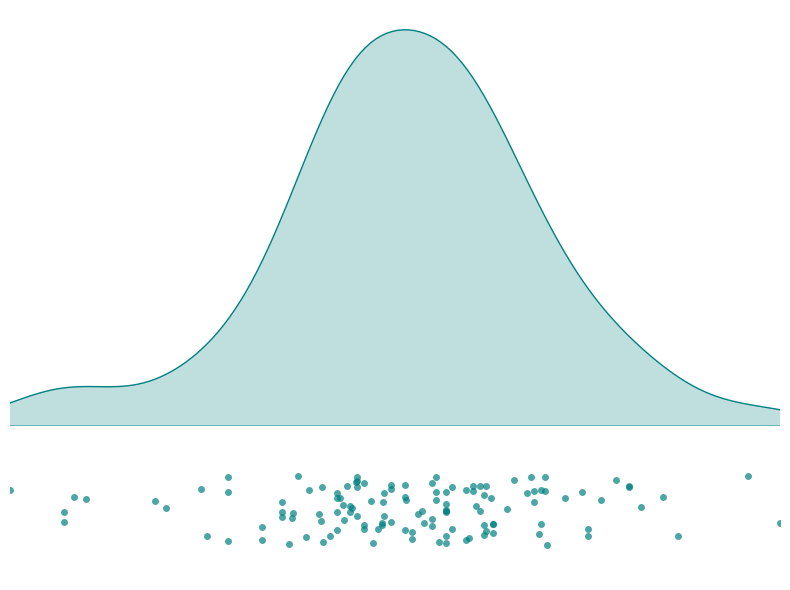

In [63]:
df_jan = df_temps[df_temps['month_name'] == 'January']

x_min, x_max = df_jan['meantemp'].min(), df_jan['meantemp'].max()

fig = plt.figure(figsize=(8, 6))

# two axes in one column
# top = density, bottom = scatter
grid = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[3, 1])
ax_top = fig.add_subplot(grid[0])
ax_bottom = fig.add_subplot(grid[1])

# density plot
sns.kdeplot(data=df_jan, x='meantemp', fill=True, ax=ax_top, color='teal')
ax_top.set_xlim(x_min, x_max)
# remove all axis lines, ticks, and labels
ax_top.set_xlabel("")
ax_top.set_ylabel("")
ax_top.set_xticks([])
ax_top.set_yticks([])
for spine in ax_top.spines.values():
    spine.set_visible(False)

# scatter plot
sns.stripplot(data=df_jan, x='meantemp', ax=ax_bottom, jitter=0.25, color='teal', alpha=0.7)
ax_bottom.set_xlim(x_min, x_max)
# remove all axis lines, ticks, and labels
ax_bottom.set_xlabel("")
ax_bottom.set_ylabel("")
ax_bottom.set_xticks([])
ax_bottom.set_yticks([])
for spine in ax_bottom.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

**(b)** Now let's do a little more design:
* Use a vertical line to show the mean temperature for January
* Color both charts using `coolwarm` color palette
  * Set 0 as low and 40 as high
  * Use the mean value / 40 as the fraction for the color palette
  
**Note**:  
* https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html uses proportions for its boundary values (0 is min, 1 is max)
* https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.vlines.html#matplotlib.axes.Axes.vlines uses data coordinates


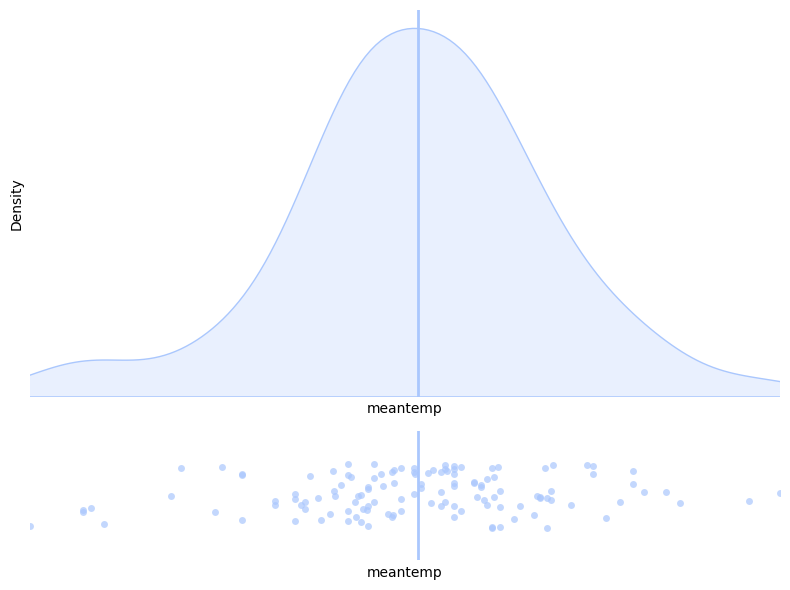

In [44]:
df_jan = df_temps[df_temps['month_name'] == 'January']
x_min, x_max = df_jan['meantemp'].min(), df_jan['meantemp'].max()
jan_mean = df_jan['meantemp'].mean()

# fraction from 0 to 40
fraction = jan_mean / 40
color_val = plt.cm.coolwarm(fraction)

fig = plt.figure(figsize=(8, 6))
grid = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[3, 1])
ax_top = fig.add_subplot(grid[0])
ax_bottom = fig.add_subplot(grid[1])

# density
sns.kdeplot(data=df_jan, x='meantemp', fill=True, ax=ax_top, color=color_val)
ax_top.axvline(jan_mean, color=color_val, linewidth=2)
ax_top.set_xlim(x_min, x_max)
ax_top.set_xticks([])
ax_top.set_yticks([])
for spine in ax_top.spines.values():
    spine.set_visible(False)

# scatter
sns.stripplot(data=df_jan, x='meantemp', ax=ax_bottom, jitter=0.25, color=color_val, alpha=0.7)
ax_bottom.axvline(jan_mean, color=color_val, linewidth=2)
ax_bottom.set_xlim(x_min, x_max)
ax_bottom.set_xticks([])
ax_bottom.set_yticks([])
for spine in ax_bottom.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

### Problem 3 (4 points)

Use the previous problem to show temperature averages across all months:
* Create 12 raincloud charts, 1 per month, and stack them vertically
* Use the same low and high temperature on each chart (ranges from about 3 to about 42)
* Use the same y-axis values on each density curve
* Color each individual month according to the `coolwarm` color palette
  * Use the mean temperature value for each month
  * Compute the range of average temperatures to use as your interval (lowest average should map to about 0, and highest average should map to about 1) 
* Include the mean temperature line on each density curve
  
Additional design elements:
* Get rid of any extraneous legends, axis lines, box lines (spines), etc. 
* Plot a grid line at 0 for each density curve
* Label the months on each chart 
* Get rid of excess vertical whitespace
* Show units on x-axis once at the bottom of the figure
* Create a figure title

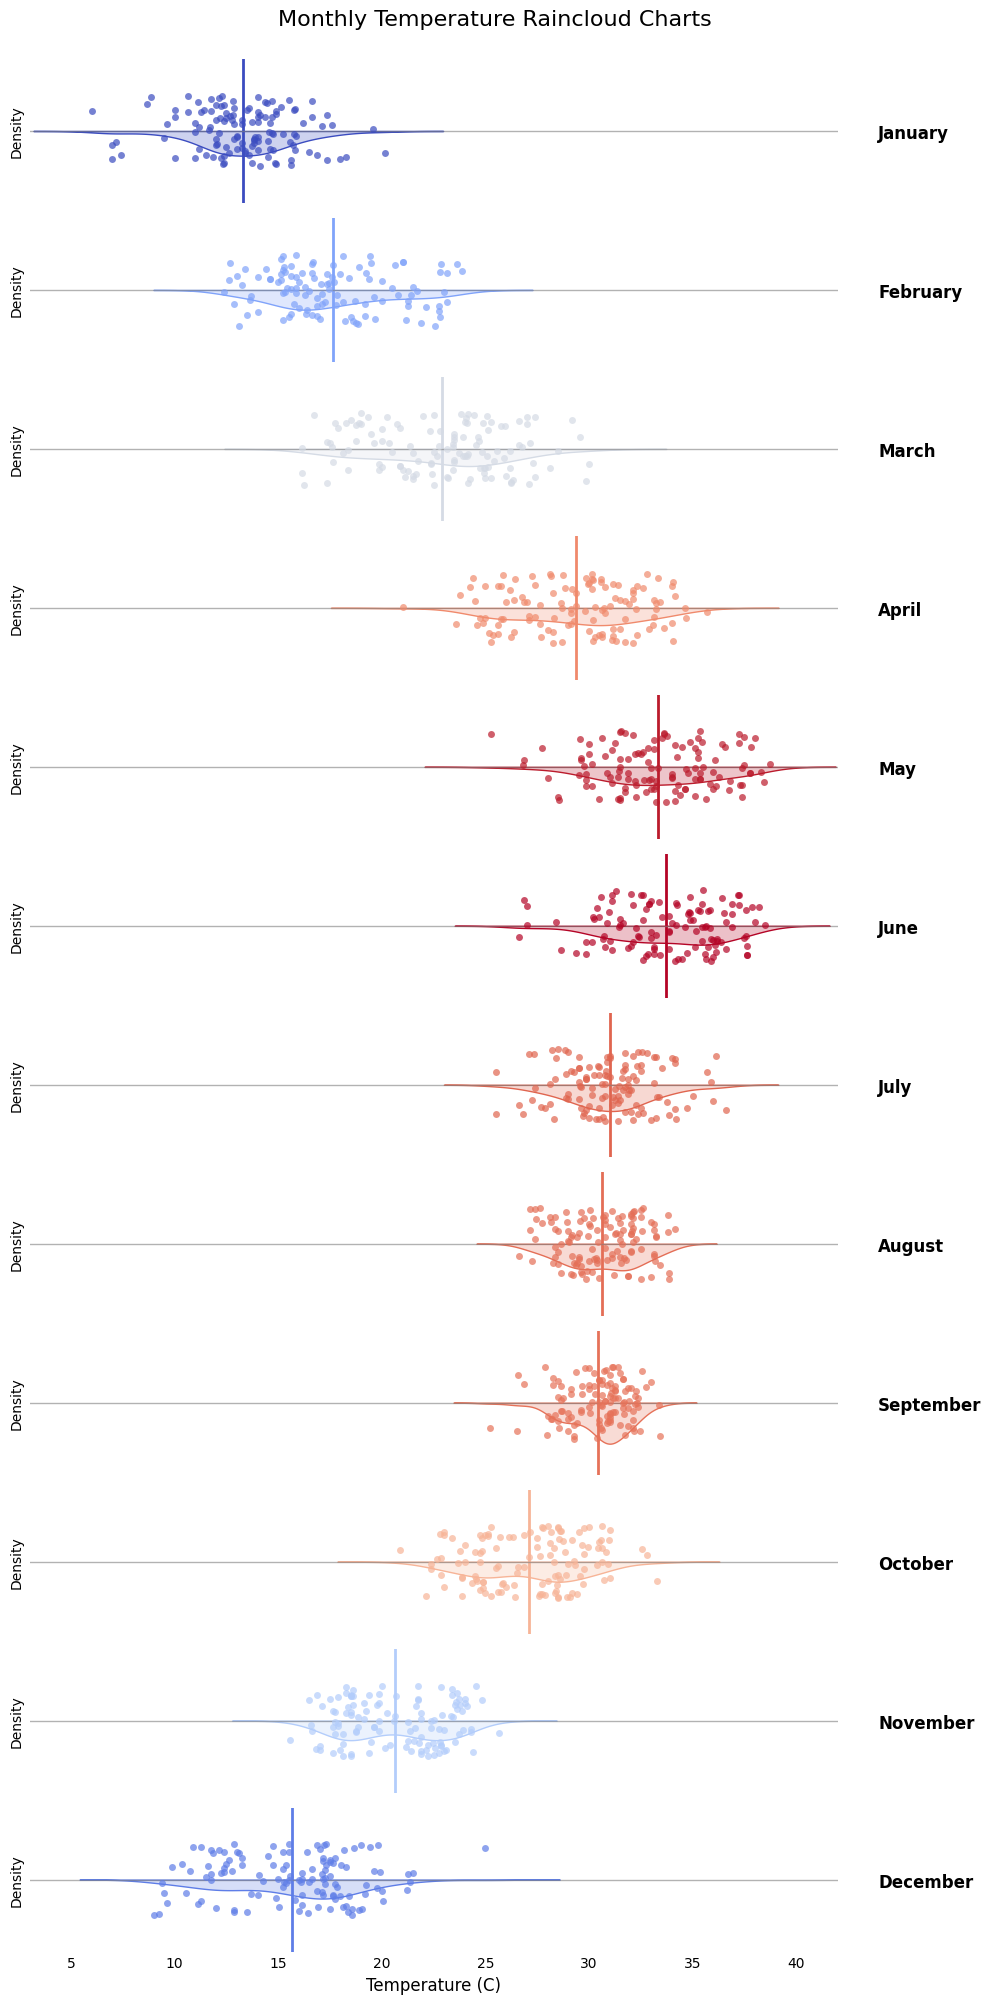

In [72]:
all_min = df_temps['meantemp'].min()
all_max = df_temps['meantemp'].max()

x_min, x_max = 3, 42

# each month's mean
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

monthly_means = df_temps.groupby('month_name')['meantemp'].mean()

min_mean = monthly_means.min()
max_mean = monthly_means.max()

fig_height = 20
fig = plt.figure(figsize=(10, fig_height))
grid = fig.add_gridspec(nrows=12, ncols=1, height_ratios=[1]*12)

for i, mon in enumerate(month_order):
    ax = fig.add_subplot(grid[i])
    df_mon = df_temps[df_temps['month_name'] == mon]

    # get mean
    mon_mean = monthly_means.loc[mon]
    fraction = (mon_mean - min_mean) / (max_mean - min_mean)
    color_val = plt.cm.coolwarm(fraction)

    # density plot
    sns.kdeplot(data=df_mon, x='meantemp', fill=True, ax=ax, color=color_val)
    ax.axvline(mon_mean, color=color_val, linewidth=2)
    ax.axhline(0, color='gray', linewidth=1, alpha=0.6)  # grid line at 0

    # scatter below
    sns.stripplot(data=df_mon, x='meantemp', ax=ax, jitter=0.25, color=color_val, alpha=0.7)

    # remove spines and ticks
    ax.set_xlim(x_min, x_max)
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

    # this was a pain to get it where I wanted it
    ax.text(1.05, 0.08, mon, fontsize=12, fontweight='bold', 
            transform=ax.get_yaxis_transform(), ha='left', va='bottom')

    # hide x-axis labels except on the last plot
    if i < 11:
        ax.set_xlabel("")
        ax.set_xticks([])
    ax.tick_params(axis="x", length = 0)

plt.suptitle("Monthly Temperature Raincloud Charts", fontsize=16, y=1.00)
plt.xlabel("Temperature (C)", fontsize=12)
plt.tight_layout()
plt.show()

### Problem 4 (3 points)

Let's go back to the original data frame:

In [127]:
df_temps.head()

,date,meantemp,humidity,wind_speed,meanpressure,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,January
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,January
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,January
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,January
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,January


**(a)** Create a scatter plot to plot `meantemp` against `humidity`. Include a line of best fit:
*  https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

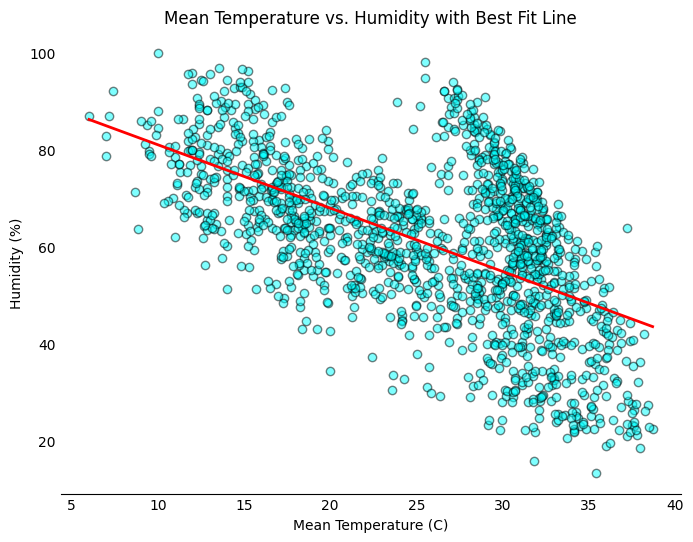

In [78]:
x = df_temps['meantemp']
y = df_temps['humidity']

# fit
m, b = np.polyfit(x, y, 1) # slope, intercept

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, alpha=0.5, edgecolor='k', facecolor='cyan')
# line of best fit
xfit = np.linspace(x.min(), x.max(), 100)
yfit = m*xfit + b
ax.plot(xfit, yfit, color='red', linewidth=2)
ax.set_xlabel("Mean Temperature (C)")
ax.set_ylabel("Humidity (%)")
ax.set_title("Mean Temperature vs. Humidity with Best Fit Line")

ax.tick_params(axis="x", length = 0)
ax.tick_params(axis="y", length = 0)
ax.spines[["left", "top", "right"]].set_visible(False)

plt.show()

**(b)** Update the scatter plot by coloring dots by season:
* Use December, January, February as winter
* Use March, April, May as spring
* Use June, July, August as summer
* Use September, October, November as fall

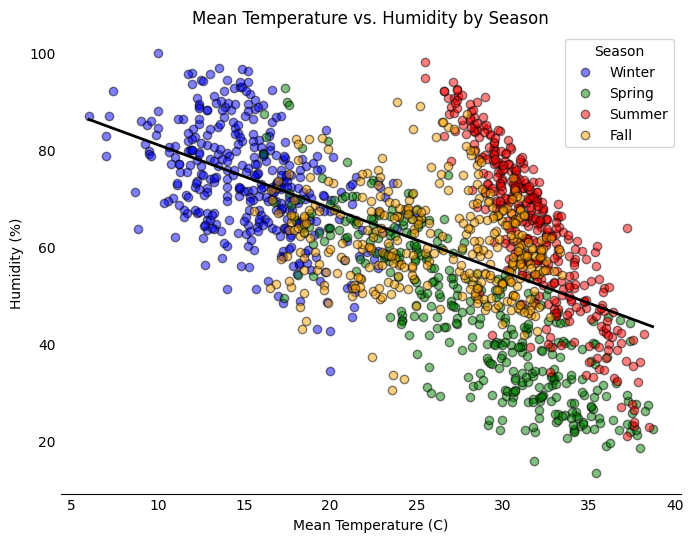

In [79]:

def assign_season(row):
    m = row['date'].month
    if m in [12, 1, 2]:
        return 'Winter'
    elif m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_temps['season'] = df_temps.apply(assign_season, axis=1)

# color map for seasons
season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Fall': 'orange'}

fig, ax = plt.subplots(figsize=(8, 6))
for season in season_colors.keys():
    subset = df_temps[df_temps['season'] == season]
    ax.scatter(subset['meantemp'], subset['humidity'], 
               color=season_colors[season], alpha=0.5, edgecolor='k', label=season)

# best fit line
m, b = np.polyfit(df_temps['meantemp'], df_temps['humidity'], 1)
xfit = np.linspace(df_temps['meantemp'].min(), df_temps['meantemp'].max(), 100)
yfit = m*xfit + b
ax.plot(xfit, yfit, color='black', linestyle='-', linewidth=2)

ax.legend(title="Season")
ax.set_xlabel("Mean Temperature (C)")
ax.set_ylabel("Humidity (%)")
ax.set_title("Mean Temperature vs. Humidity by Season")

ax.tick_params(axis="x", length = 0)
ax.tick_params(axis="y", length = 0)
ax.spines[["left", "top", "right"]].set_visible(False)

plt.show()

**(c)** Finally, split the scatter plot into 4 individual charts:
* Use a 2x2 grid, with one chart per season
* Label the season for each individual chart
* Use the same x and y coordinate ranges on each chart
* Include an individual line of best fit for each chart


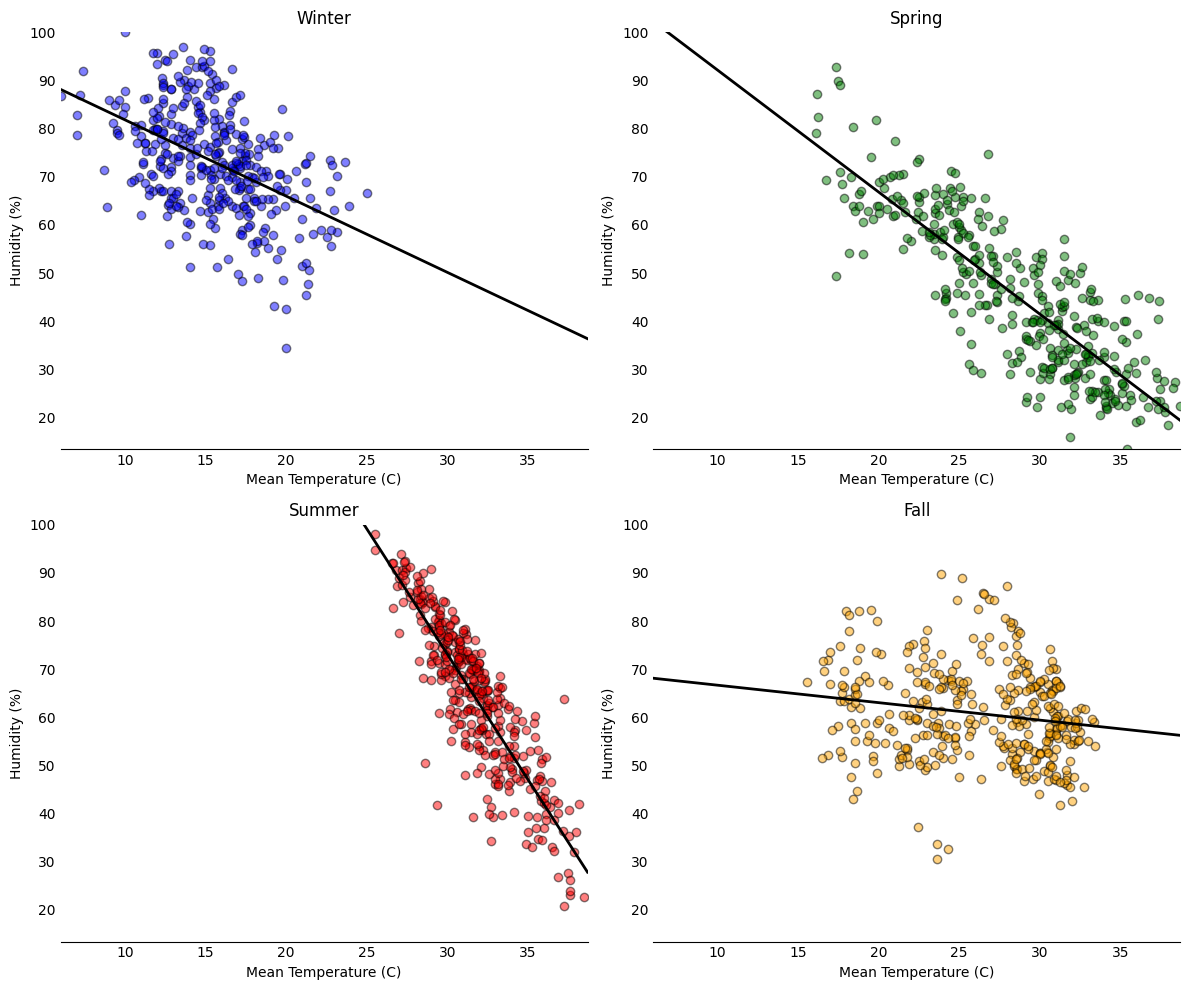

In [80]:
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
x_min, x_max = df_temps['meantemp'].min(), df_temps['meantemp'].max()
y_min, y_max = df_temps['humidity'].min(), df_temps['humidity'].max()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, season in enumerate(seasons):
    ax = axes[i]
    subset = df_temps[df_temps['season'] == season]
    x = subset['meantemp']
    y = subset['humidity']

    ax.scatter(x, y, color=season_colors[season], alpha=0.5, edgecolor='k')
    # best fit line for season
    m, b = np.polyfit(x, y, 1)
    xfit = np.linspace(x_min, x_max, 100)
    yfit = m*xfit + b
    ax.plot(xfit, yfit, color='black', linewidth=2)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(season)
    ax.set_xlabel("Mean Temperature (C)")
    ax.set_ylabel("Humidity (%)")

    ax.tick_params(axis="x", length = 0)
    ax.tick_params(axis="y", length = 0)
    ax.spines[["left", "top", "right"]].set_visible(False)

plt.tight_layout()
plt.show()